In [64]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns



In [65]:
df = pd.read_csv('../data/Customer-Churn-Records.csv')
df.shape

(10000, 18)

## Exploratory Data Analysis

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

It can be seen that there are no misising values in this dataset. Now, an example of the dataset can be viewed to check a sample.

In [67]:
df.sample()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
8220,8221,15727177,Manfrin,557,France,Male,42,6,177822.03,1,1,0,150944.31,1,1,3,PLATINUM,513


In [68]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


It can be seen that the mean Credit Score of the 10000 customers is 650 with a standard deviation of 96. It can also be seen that a significant percent of the customers have a balance of 0. In addition to this, the std of the balance is very high, which could be something to note. The same trend can be noticed with the Estimated Salary as well. About 20% of the customer base has exited. 

In [69]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

This shows that all the customers in the dataset belong to either one of these three countries. 

## Feature Engineering

Several features can be added to aid in the visualisation process. While these new features might not completely aid us in the modelling, it can help make the visualisations a lot more intuitive. 

In [70]:
bins = [18, 25, 30, 45, 60, 75, 92]
labels = ['18-24', '25-30', '31-45', '46-60', '61-75', '76-92']
df['age_buckets'] = pd.cut(df['Age'], bins = bins, include_lowest = True, labels = labels)

First, we inspect the difference in estimated salary and balance between customers that have a credit card and those that don't. The difference can be shown through visual methods.

Now, let us inspect the average bank balance for the different age groups. 

Next let us look at the difference in the average balance of customers that exited compared to those that did not. 

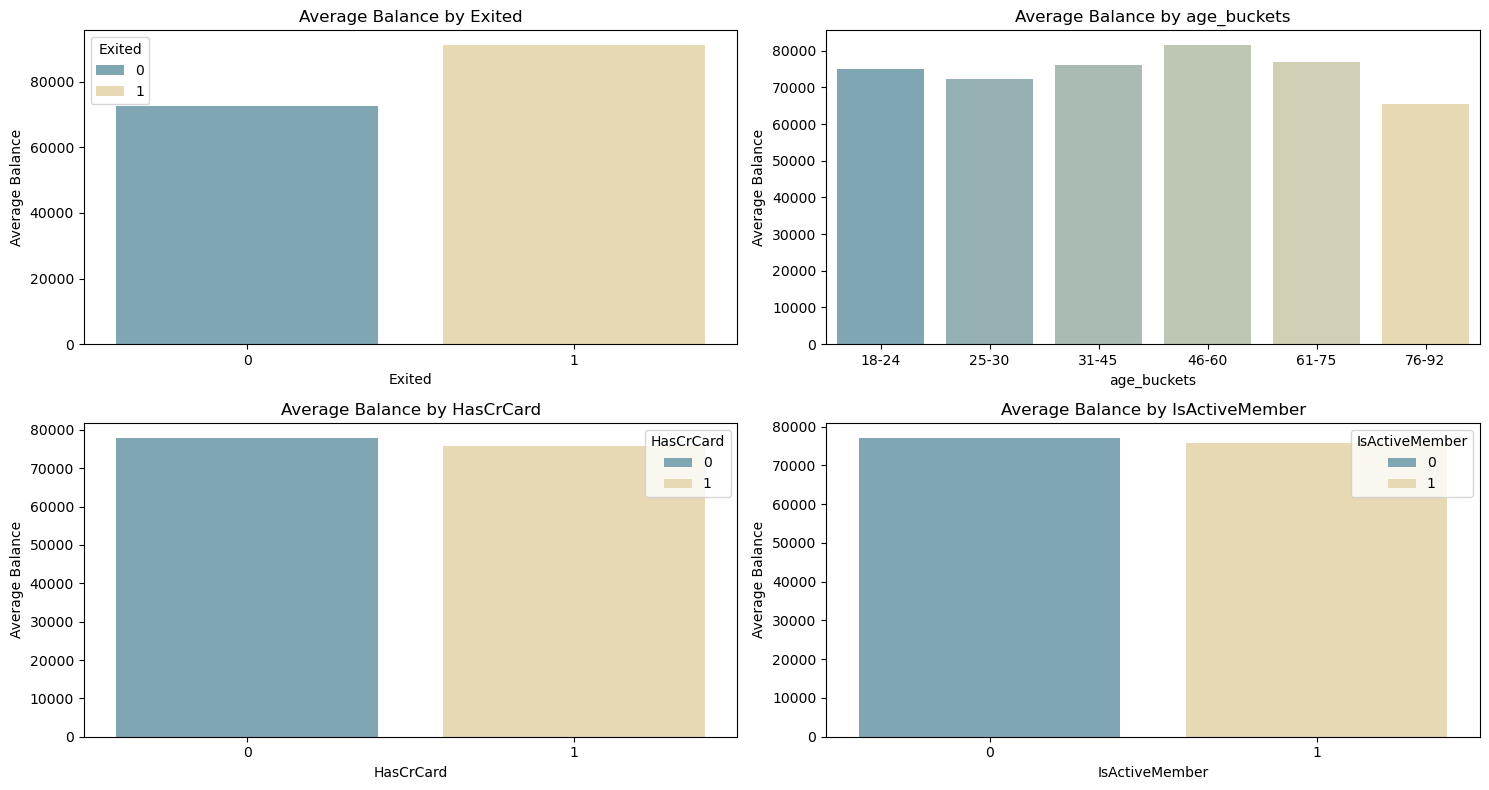

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(['Exited', 'age_buckets', 'HasCrCard', 'IsActiveMember']):
    col_stats = df.groupby(col, observed = False)['Balance'].mean().reset_index()
    
    sns.barplot(data=col_stats, x=col, y='Balance', hue=col, palette="blend:#7AB,#EDA", ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Average Balance')
    axes[i].set_title(f'Average Balance by {col}')

plt.tight_layout()
plt.show()

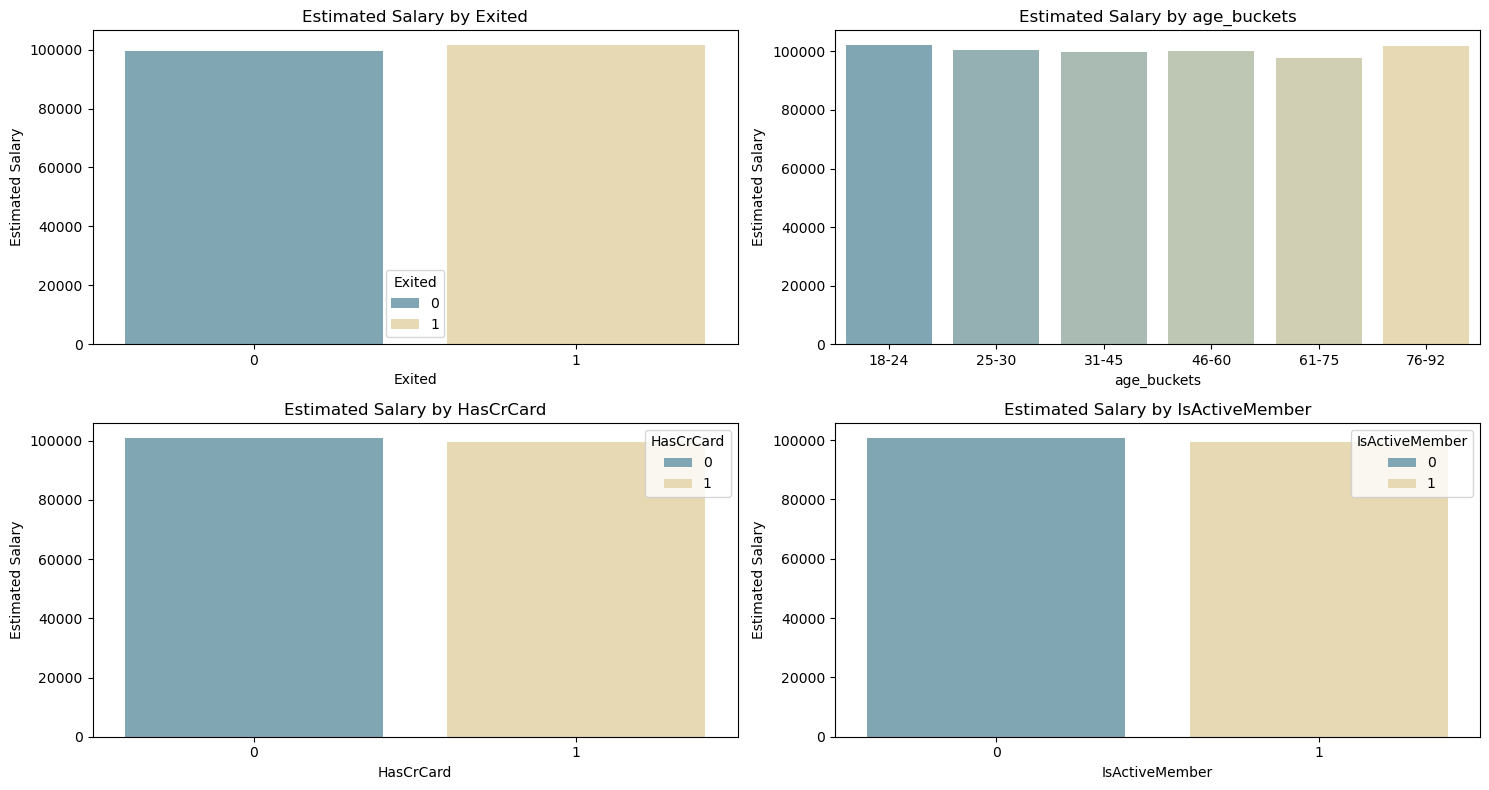

In [72]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(['Exited', 'age_buckets', 'HasCrCard', 'IsActiveMember']):
    col_stats = df.groupby(col, observed = False)['EstimatedSalary'].mean().reset_index()
    
    sns.barplot(data=col_stats, x=col, y='EstimatedSalary', hue=col, palette="blend:#7AB,#EDA", ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Estimated Salary')
    axes[i].set_title(f'Estimated Salary by {col}')

plt.tight_layout()
plt.show()

We see that Balance seems to have a higher correlation with some of the other variables compared to Estimated Salary. This can be verified using a correlation matrix

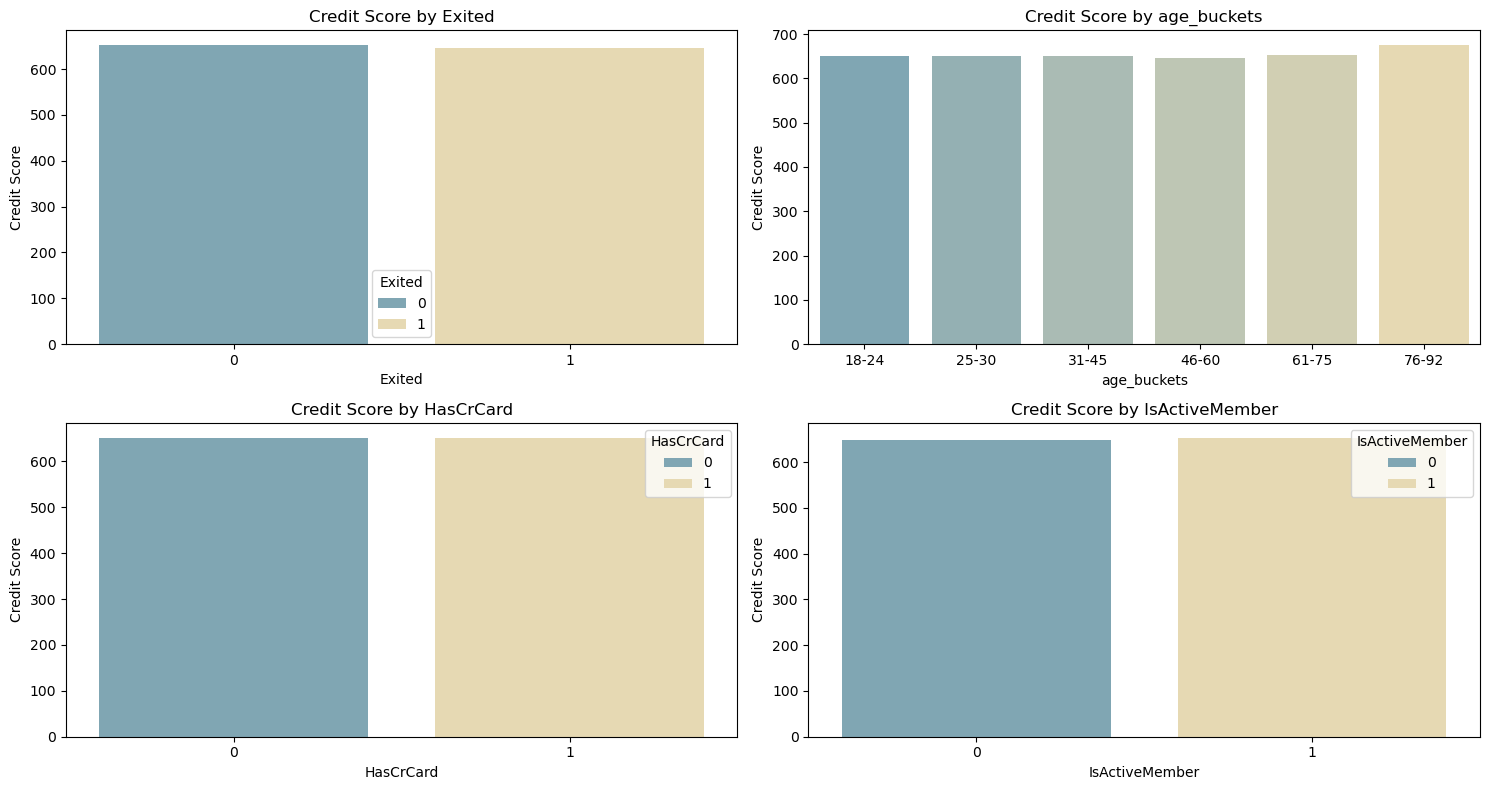

In [73]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(['Exited', 'age_buckets', 'HasCrCard', 'IsActiveMember']):
    col_stats = df.groupby(col, observed = False)['CreditScore'].mean().reset_index()
    
    sns.barplot(data=col_stats, x=col, y='CreditScore', hue=col, palette="blend:#7AB,#EDA", ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Credit Score')
    axes[i].set_title(f'Credit Score by {col}')

plt.tight_layout()
plt.show()

In [ ]:
cols = df.columns.to_list()
cols = cols[:13] + cols[14:-1] + [cols[13]]
df = df[cols]



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,DIAMOND,300,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,5,PLATINUM,771,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,3,SILVER,564,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2,GOLD,339,1


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Complain            10000 non-null  int64  
 14  Satisfaction Score  10000 non-null  int64  
 15  Card Type           10000 non-null  object 
 16  Point

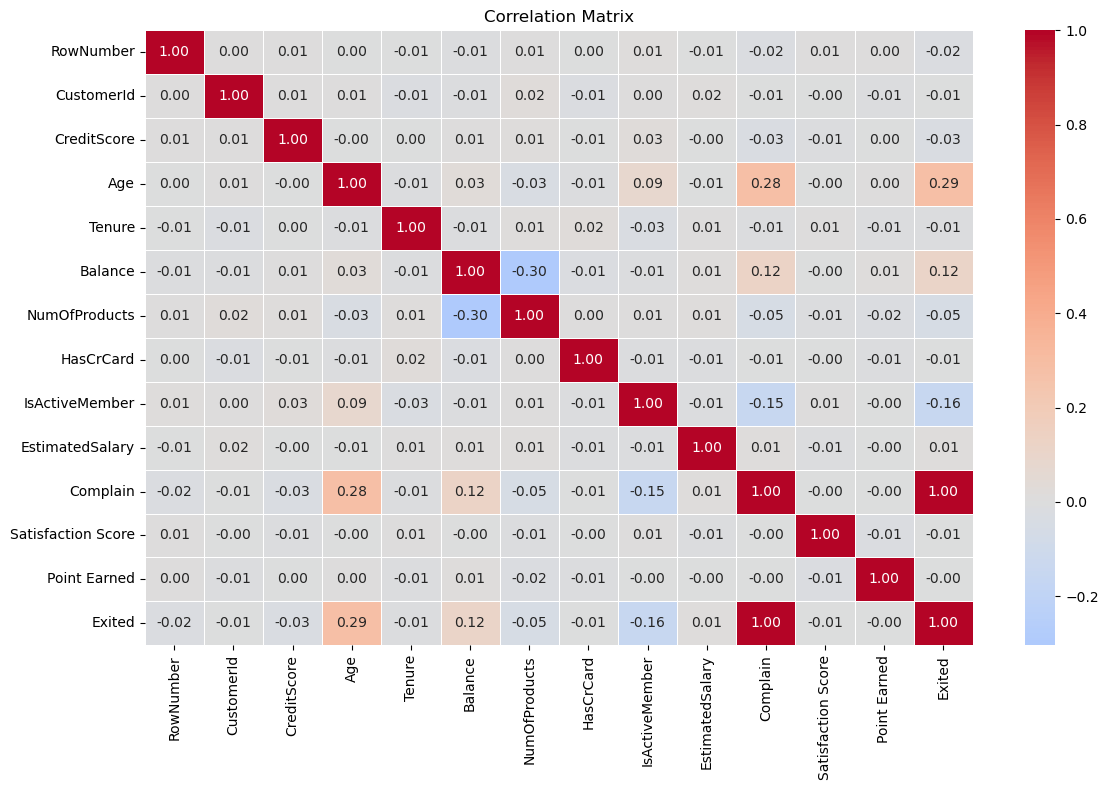

In [79]:
num_cols = df.select_dtypes(['int64', 'float64']).columns.tolist()
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

This shows us that Age, Balance, and whether the customer is an active member seems to have small correlations to the exit variable. However, the correlation matrix shows us one important correlation between the exit and complain variable which shows that there is a perfect positive correlation between a customer issuing a complaint and them leaving.  